<a href="https://colab.research.google.com/github/aburne11/BootCampTry4/blob/main/Visualisation_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a notebook that everyone can access at the same time - Please make a copy by going to > FILE > Save a Copy



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Load required Libraries
import pandas as pd
import numpy as np
from plotnine import *

In [ ]:
# We run this to suppress various deprecation warnings from plotnine - keeps our notebook cleaner
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
baseData = pd.read_pickle('<DataSet>')
baseData.head()

,ST,sidetrack_num,formation_code,well_status,prod_days,water_disp_code,water_vol,water_press_tbg,water_press_csg,bom_invent,oil_vol,adjustment,eom_invent,gravity_sale,gas_vol,shrink,gas_prod,gas_press_tbg,gas_press_csg,operator_num,name,facility_name,facility_num,accepted_date,revised,Year,Month,Date,Api_seq_num,API,API_Label,Operat_Num,Operator,Well_Num,Well_Name,Well_Title,Citing_Typ,Spud_Date,Ground_Ele,Max_MD,Max_TVD,Field_Code,Field_Name,Facil_Id,Facil_Type,Facil_Stat,Stat_Date,Loc_Qual,Loc_ID,Loc_Name,Dist_N_S,Dir_N_S,Dist_E_W,Dir_E_W,Qtr_Qtr,Section,Township,Range,Meridian,Latitude,Longitude,Utm_X,Utm_Y,spud_date,stat_date,API_8,Sidetrack_num,formation_cat,well_stat_cat
1999-08-01,5,0,NB-CD,PR,21.0,NaN,NaN,NaN,NaN,38.0,33.0,NaN,71.0,NaN,NaN,NaN,308.0,NaN,NaN,41385,HS RESOURCES INC ...,HSR-RENSHAW,5-28A,1999-12-20 00:00:00,NaN,1999,8,1999-08-01,14340,1231434000,05-123-14340,47120,KERR MCGEE OIL & GAS ONSHORE LP,5-28A,HSR-RENSHAW,5-28A HSR-RENSHAW,ACTUAL,07/19/1989,4948.0,8011.0,NaN,90750.0,WATTENBERG,246543,WELL,TA,11/01/2019,ACTUAL LatLong,327224,HSR-RENSHAW-63N66W 28SWNW,1980.0,N,660.0,W,SWNW,28,3N,66W,6,40.19779,-104.78922,517940,4449732,1989-07-19,2019-11-01,12314340,00,NB-CD,PR
1999-10-01,5,0,NB-CD,PR,31.0,NaN,NaN,NaN,NaN,10.0,40.0,NaN,18.0,52.9,NaN,NaN,258.0,NaN,NaN,41385,HS RESOURCES INC ...,HSR-RENSHAW,5-28A,1999-12-20 00:00:00,NaN,1999,10,1999-10-01,14340,1231434000,05-123-14340,47120,KERR MCGEE OIL & GAS ONSHORE LP,5-28A,HSR-RENSHAW,5-28A HSR-RENSHAW,ACTUAL,07/19/1989,4948.0,8011.0,NaN,90750.0,WATTENBERG,246543,WELL,TA,11/01/2019,ACTUAL LatLong,327224,HSR-RENSHAW-63N66W 28SWNW,1980.0,N,660.0,W,SWNW,28,3N,66W,6,40.19779,-104.78922,517940,4449732,1989-07-19,2019-11-01,12314340,00,NB-CD,PR
1999-06-01,5,0,NB-CD,PR,30.0,NaN,NaN,NaN,NaN,28.0,40.0,NaN,68.0,NaN,NaN,NaN,401.0,NaN,NaN,41385,HS RESOURCES INC ...,HSR-RENSHAW,5-28A,1999-11-18 00:00:00,NaN,1999,6,1999-06-01,14340,1231434000,05-123-14340,47120,KERR MCGEE OIL & GAS ONSHORE LP,5-28A,HSR-RENSHAW,5-28A HSR-RENSHAW,ACTUAL,07/19/1989,4948.0,8011.0,NaN,90750.0,WATTENBERG,246543,WELL,TA,11/01/2019,ACTUAL LatLong,327224,HSR-RENSHAW-63N66W 28SWNW,1980.0,N,660.0,W,SWNW,28,3N,66W,6,40.19779,-104.78922,517940,4449732,1989-07-19,2019-11-01,12314340,00,NB-CD,PR
1999-03-01,5,0,NB-CD,PR,29.0,NaN,NaN,NaN,NaN,12.0,56.0,NaN,68.0,NaN,NaN,NaN,509.0,NaN,NaN,41385,HS RESOURCES INC ...,HSR-RENSHAW,5-28A,1999-11-29 00:00:00,NaN,1999,3,1999-03-01,14340,1231434000,05-123-14340,47120,KERR MCGEE OIL & GAS ONSHORE LP,5-28A,HSR-RENSHAW,5-28A HSR-RENSHAW,ACTUAL,07/19/1989,4948.0,8011.0,NaN,90750.0,WATTENBERG,246543,WELL,TA,11/01/2019,ACTUAL LatLong,327224,HSR-RENSHAW-63N66W 28SWNW,1980.0,N,660.0,W,SWNW,28,3N,66W,6,40.19779,-104.78922,517940,4449732,1989-07-19,2019-11-01,12314340,00,NB-CD,PR
1999-07-01,5,0,NB-CD,PR,31.0,NaN,NaN,NaN,NaN,68.0,40.0,NaN,38.0,54.3,NaN,NaN,368.0,NaN,NaN,41385,HS RESOURCES INC ...,HSR-RENSHAW,5-28A,1999-11-18 00:00:00,NaN,1999,7,1999-07-01,14340,1231434000,05-123-14340,47120,KERR MCGEE OIL & GAS ONSHORE LP,5-28A,HSR-RENSHAW,5-28A HSR-RENSHAW,ACTUAL,07/19/1989,4948.0,8011.0,NaN,90750.0,WATTENBERG,246543,WELL,TA,11/01/2019,ACTUAL LatLong,327224,HSR-RENSHAW-63N66W 28SWNW,1980.0,N,660.0,W,SWNW,28,3N,66W,6,40.19779,-104.78922,517940,4449732,1989-07-19,2019-11-01,12314340,00,NB-CD,PR


### Important parts of a ggplot system
- data: Has two elements to it: 1) Pass the data 2) Send in the aesthetics. The data is the input data you want to use. The aesthetics are like the colors you want to use to paint a canvas. We hence would need to tell what columns within the data you want to use. Also how the data should look like - eg. Color
- geom: what is that you want to see? lines, bars, pies etc
- stats: summary functions that you want to apply
- scale: What if you want the color of your points to be a function of something? - I want a scatter plot between age and income but I want the points to be darker if the person has more years of experience and lighter if the person has less experience
- facet: If you want to break the data into different groups. Each group is one facet: Example: https://docs.google.com/document/d/15XT5R53VgAkIXaD8ZVzF1WAxSAU5aWdzOojdsmhbkqw/edit?usp=sharing

Note: The API documentation of ALL the parts are present in :
https://plotnine.readthedocs.io/en/stable/api.html

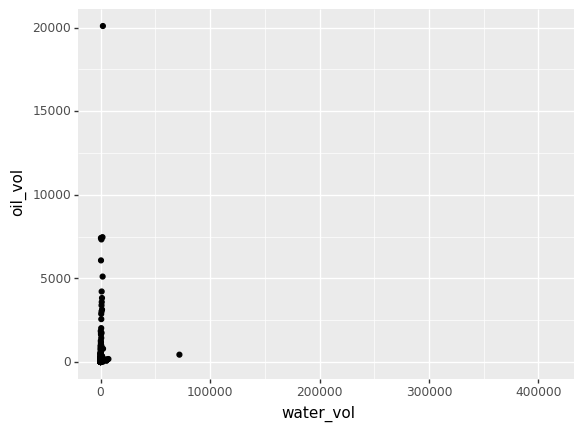

<ggplot: (8766629305001)>

In [ ]:
# layer 1: Pass data and map the aesthetics
# Layer : Wish to see a scatter plot so choosing geom_point

# Notice that each layer is like a effort on your canvas and you add one layer after another and its coded by adding one layer after another separated by '+'

ggplot(baseData.sample(1000), aes(x = 'water_vol', y = 'oil_vol')) + geom_point()

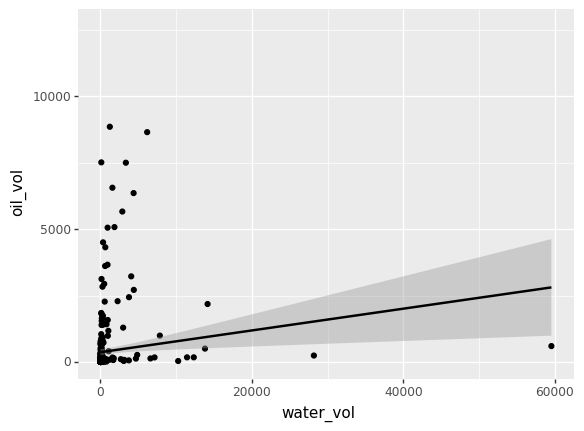

<ggplot: (8766624988876)>

In [ ]:
# What if I want to summarise the distribution? Perhaps add a mean line
# Note: The band around the mean line is like a confidence of the mean line: less confident if wide and when the pounts are spread apart

ggplot(baseData.sample(1000), aes(x = 'water_vol', y = 'oil_vol')) + geom_point() + stat_smooth()

In [ ]:
sample_data = baseData.sample(1000)
sample_data = sample_data[~sample_data['water_vol'].isnull()]
sample_data.shape

(464, 69)

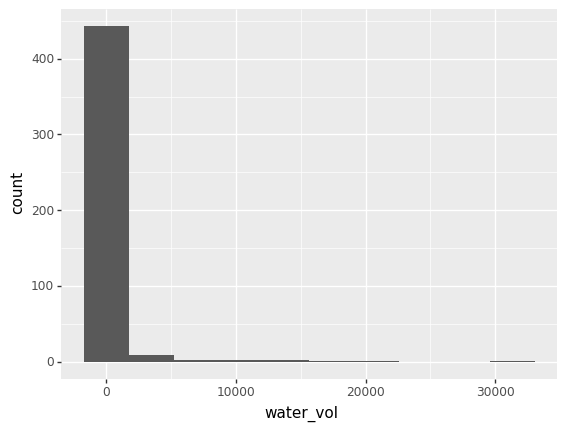

<ggplot: (-9223363294876890515)>

In [ ]:
# Each geom also has arguments within them and can be found in the API documentation
ggplot(sample_data, aes(x = 'water_vol')) + geom_histogram(bins=10)

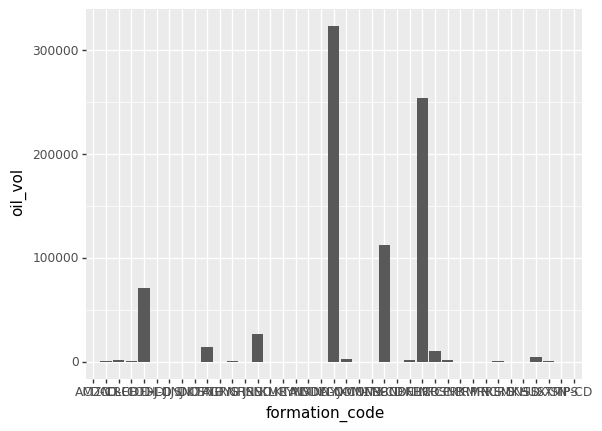

<ggplot: (-9223363270230088048)>

In [ ]:
# Bar Graph

ggplot(baseData.sample(5000), aes(x = 'formation_code', y = 'oil_vol')) + geom_bar(stat = 'identity')

# Note that I used a summary stat which is 'identity' because geom_bar would work as a histogram and runs a count function if non stated. 

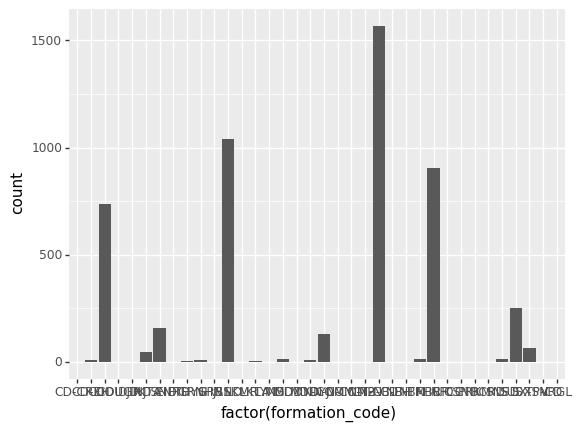

<ggplot: (8766624687638)>

In [ ]:
# This runs a count if not specified by 'stat = identity'. It essentially takes counts of observation in each bucket. 
# Factor(x) is done to ensure you regard each category as bins (Confusing! I know!)
ggplot(baseData.sample(5000), aes(x = 'factor(formation_code)')) + geom_bar()

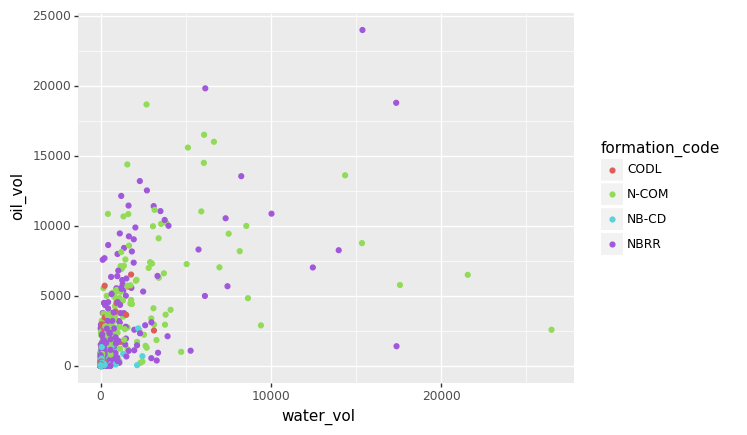

<ggplot: (-9223363270247954523)>

In [ ]:
# Let us add another dimension to the previous scatter plot
sample_data = baseData[baseData['formation_code'].isin(['NBRR', 'CODL', 'NB-CD', 'N-COM'])].sample(10000)
ggplot(sample_data, aes(x = 'water_vol', y = 'oil_vol', color = 'formation_code')) + geom_point()

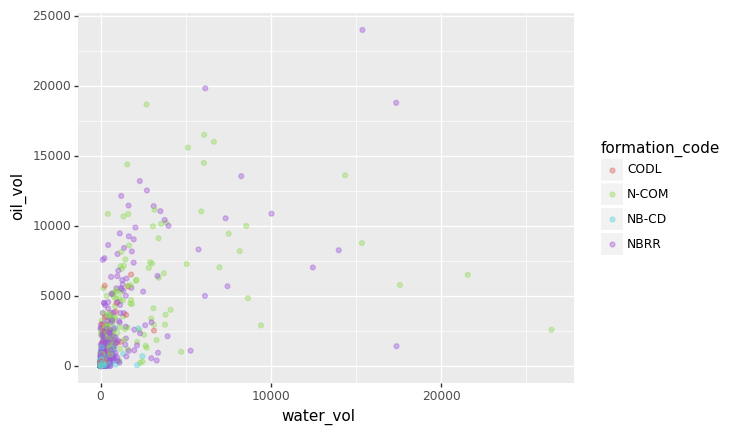

<ggplot: (8766606866247)>

In [ ]:
# Notice that now the colors are dictated by formation code. Something off? Too many points overlapping. Let us use a geom aesthetic alpha that can change the opacity of points
ggplot(sample_data, aes(x = 'water_vol', y = 'oil_vol', color = 'formation_code')) + geom_point(alpha = 0.4)

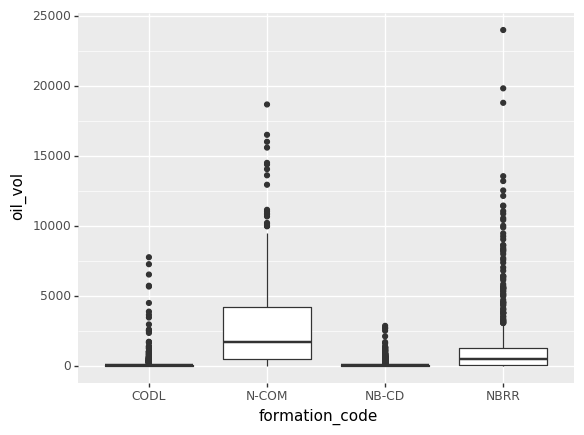

<ggplot: (8766606853117)>

In [ ]:
# Plot other distributions - Notice how its easy to compare distributions?
ggplot(sample_data, aes(x = 'formation_code', y = 'oil_vol')) + geom_boxplot() 

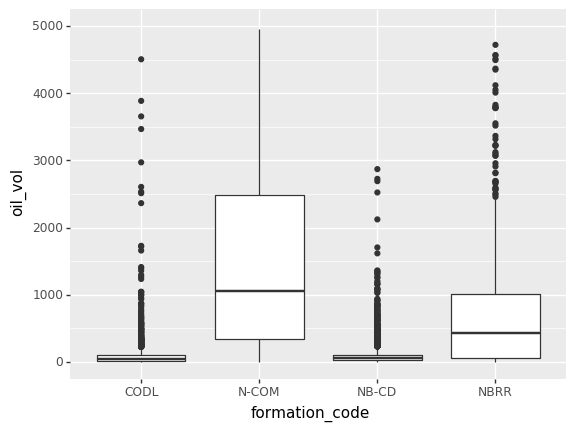

<ggplot: (8766624052579)>

In [ ]:
# there seem to be a lot of outliers. How can we limit the y axis - Scale functions using scale_y_continous
 ggplot(sample_data, aes(x = 'formation_code', y = 'oil_vol')) + geom_boxplot() + scale_y_continuous(limits = (0, 5000))

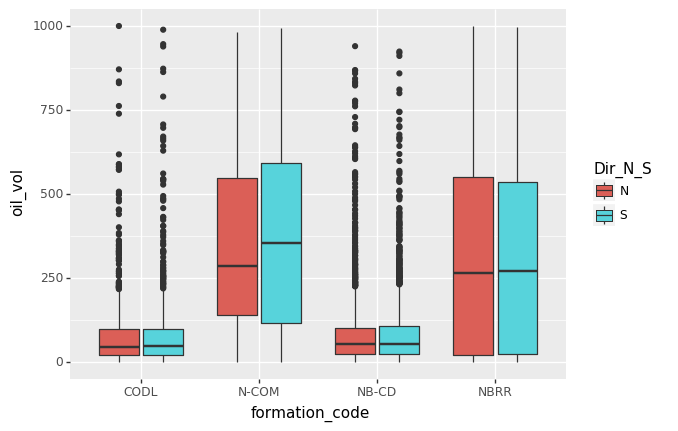

<ggplot: (8766618230946)>

In [ ]:
# Add another dimenstion
ggplot(sample_data, aes(x = 'formation_code', y = 'oil_vol', fill = 'Dir_N_S')) + geom_boxplot() + scale_y_continuous(limits = (0,1000))

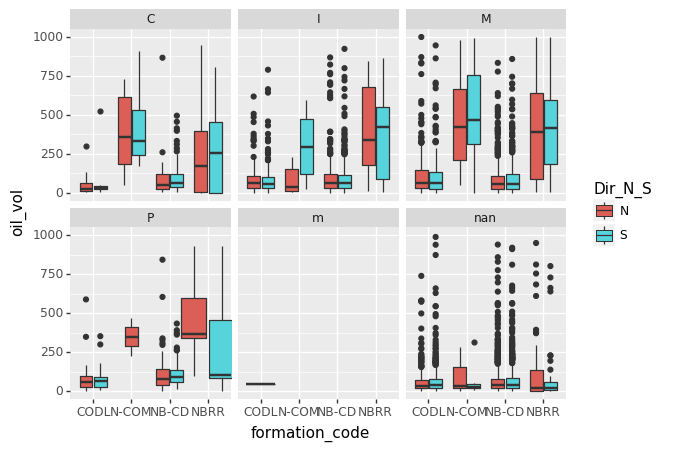

<ggplot: (-9223363270247950662)>

In [ ]:
# Add one more dimenstion - Pretty cool - just FACET!!
sample_data['well_stat_cat'] = np.where(sample_data['well_stat_cat'].isin(['DG', 'AB', 'IJ', 'DA']), 'Other', sample_data['well_stat_cat'])
ggplot(sample_data, aes(x = 'formation_code', y = 'oil_vol', fill = 'Dir_N_S')) + geom_boxplot() + scale_y_continuous(limits = (0,1000)) + facet_wrap('water_disp_code')

In [ ]:
## Stacked bar charts
# Need to reshape so that we can use as aesthetics

sample_data_melted = sample_data[['API', 'Date', 'formation_code', 'water_vol', 'oil_vol', 'gas_vol']].melt(id_vars=['API', 'Date', 'formation_code'],
                                                                                                            var_name = 'vol_type',
                                                                                                            value_name = 'vol')
sample_data_melted.head()

,API,Date,formation_code,vol_type,vol
0,1232346100,2006-09-01,CODL,water_vol,39.0
1,1231563000,2004-06-01,CODL,water_vol,20.0
2,1231715600,2007-10-01,CODL,water_vol,NaN
3,1231441100,2011-07-01,CODL,water_vol,49.0
4,1231703800,2001-08-01,NB-CD,water_vol,25.0


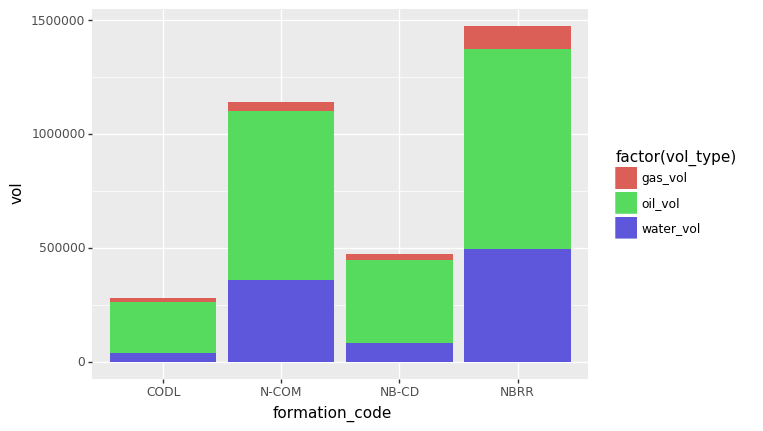

<ggplot: (8766606822099)>

In [ ]:
ggplot(sample_data_melted, aes(x = 'formation_code', y = 'vol', fill = 'factor(vol_type)')) + geom_bar(stat = 'identity')

### Additional visualizations for Laura

In [ ]:
# map the well_type_cat variable from final roll up data
rollup_df = pd.read_pickle('/content/drive/My Drive/Springboard/Laura/CP1/Capstone1/allprodaoi_final_rollup.pickle')
rollup_df.head()

,API,api_county_code,well_type_cat,well_type_cat2,Oper_Cur_Num,Oper_Cur_Name,Oper_Hist_Num,Oper_Hist_Name,Field_Code,Field_Name,UTM_X_SF,UTM_Y_SF,UTM_X_BH,UTM_Y_BH,well_status,Facil_Stat,Stat_Date,Ab_Val,TVDSS,Spud_Date,Start,End,Form1,Form2,oil_cum,gas_boe_cum,gas_mcf_cum,wtr_cum,boe_cum,prod_days,norm_oil_cum,norm_wtr_cum,norm_gas_mcf_cum,norm_gas_boe_cum,norm_boe_cum,gor,wor,oil_first_mo,gas_boe_first_mo,prod_days_first_mo,IP_one_mo,oil_two_mo,gas_boe_two_mo,prod_days_two_mo,IP_two_mo,oil_three_mo,gas_boe_three_mo,prod_days_three_mo,IP_three_mo,TotalElapsedProdTime,ProdDayRatio,ProdHist,TotalElapsedProdLengthRev
0,10502900,1,Vertical,Non-Horizontal,72085,PETRO-CANADA RESOURCES (USA) INC,94090,WALSH PRODUCTION INC ...,60000.0,NOONEN RANCH,590719,4403657,NaN,NaN,SI,PA,2000-06-22,1,-1476.0,1951-09-04,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,PartProdHist,NaT
1,10504400,1,Vertical,Non-Horizontal,72085,PETRO-CANADA RESOURCES (USA) INC,94090,WALSH PRODUCTION INC ...,60000.0,NOONEN RANCH,591032,4404791,NaN,NaN,AB,PA,2000-05-24,1,-1075.0,1959-08-30,1999-06-01,1999-12-01,JSND,JSND,317.0,62.068966,360.0,2220.0,379.068966,46 days,6.891304,48.260870,7.826087,1.349325,8.240630,1.135647,7.003155,137.0,16.551724,12.0,12.795977,298.0,53.793103,39.0,9.020336,317.0,62.068966,45.0,8.423755,183 days,0.251366,PartProdHist,14703 days
2,10507000,1,Vertical,Non-Horizontal,95620,WESTERN OPERATING COMPANY,96155,WHITING PETROLEUM CORP ...,9000.0,BUSY BEE,575649,4406679,NaN,NaN,SI,PA,1960-08-25,1,-1472.0,2001-04-16,2001-06-01,2003-04-01,DSND,DSND,4282.0,1882.241379,10917.0,12624.0,6164.241379,634 days,6.753943,19.911672,17.219243,2.968835,9.722778,2.549510,2.948155,389.0,172.931034,30.0,18.731034,766.0,336.034483,61.0,18.066139,1160.0,466.896552,92.0,17.683658,669 days,0.947683,FullProdHist,669 days
3,10524200,1,Vertical,Non-Horizontal,10330,INVESTMENT EQUIPMENT LLC,39150,HEARTLAND OIL & GAS COMPANY ...,5050.0,BADGER CREEK,607081,4412874,NaN,NaN,PR,PR,2017-05-01,0,-692.0,1953-08-21,1999-08-01,2019-11-01,DSND,DSND,5213.0,0.689655,4.0,161269.0,5213.689655,1985 days,2.626196,81.243829,0.002015,0.000347,2.626544,0.000767,30.935929,144.0,0.000000,31.0,4.645161,325.0,0.000000,61.0,5.327869,569.0,0.000000,92.0,6.184783,7397 days,0.268352,PartProdHist,24208 days
4,10526300,1,Vertical,Non-Horizontal,59100,MONAHAN* REX FAMILY TRUST,59100,MONAHAN* REX ...,54800.0,MIDDLEMIST,603503,4413136,NaN,NaN,SI,PA,2003-08-23,1,-1235.0,1952-02-27,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,PartProdHist,NaT


In [ ]:
oper_name_df = pd.DataFrame(rollup_df.Oper_Cur_Name.value_counts()).reset_index()
oper_name_df.columns = ['Oper_Cur_Name', 'n_counts']

top_10_operators = oper_name_df.head(10)
top_10_operators

,Oper_Cur_Name,n_counts
0,KERR MCGEE OIL & GAS ONSHORE LP,8292
1,NOBLE ENERGY INC,7696
2,PDC ENERGY INC,3583
3,CRESTONE PEAK RESOURCES OPERATING LLC,1925
4,OWN RESOURCES OPERATING LLC,1847
5,FOUNDATION ENERGY MANAGEMENT LLC,1587
6,SRC ENERGY INC,1531
7,EXTRACTION OIL & GAS INC,1521
8,KP KAUFFMAN COMPANY INC,1157
9,GREAT WESTERN OPERATING COMPANY LLC,802


In [ ]:
# Melt the data to get volumes
limitfms = rollup_df[rollup_df['Form2'].isin(['NB-CD','NBRR','CODL','JSND','SUSX','N-COM','DSND','SX-SN','NBFHC','CD-FH','CLCDFH','NFCC'])]

top_10_data = limitfms[limitfms['Oper_Cur_Name'].isin(top_10_operators['Oper_Cur_Name'])]
top_10_data.head()

,API,api_county_code,well_type_cat,well_type_cat2,Oper_Cur_Num,Oper_Cur_Name,Oper_Hist_Num,Oper_Hist_Name,Field_Code,Field_Name,UTM_X_SF,UTM_Y_SF,UTM_X_BH,UTM_Y_BH,well_status,Facil_Stat,Stat_Date,Ab_Val,TVDSS,Spud_Date,Start,End,Form1,Form2,oil_cum,gas_boe_cum,gas_mcf_cum,wtr_cum,boe_cum,prod_days,norm_oil_cum,norm_wtr_cum,norm_gas_mcf_cum,norm_gas_boe_cum,norm_boe_cum,gor,wor,oil_first_mo,gas_boe_first_mo,prod_days_first_mo,IP_one_mo,oil_two_mo,gas_boe_two_mo,prod_days_two_mo,IP_two_mo,oil_three_mo,gas_boe_three_mo,prod_days_three_mo,IP_three_mo,TotalElapsedProdTime,ProdDayRatio,ProdHist,TotalElapsedProdLengthRev
34,10616400,1,Vertical,Non-Horizontal,69175,PDC ENERGY INC,6570,"BATAA OIL, INC. ...",90750.0,WATTENBERG,508100,4427556,NaN,NaN,SI,PA,2012-09-15,1,-3323.0,1970-06-22,1999-01-01,2012-09-01,JSND,JSND,3405.0,29121.379310,168904.0,7295.0,32526.379310,4664 days,0.730060,1.564108,36.214408,6.243863,6.973924,49.604699,2.142438,58.0,304.655172,31.0,11.698554,100.0,644.827586,59.0,12.624196,178.0,896.724138,88.0,12.212774,4992 days,0.934295,PartProdHist,15412 days
38,10617400,1,Vertical,Non-Horizontal,10110,GREAT WESTERN OPERATING COMPANY LLC,14500,"CASCADE OIL AND GAS, INC ...",13000.0,COUGAR,553489,4420003,NaN,NaN,SI,PA,2014-07-03,1,-2263.0,1970-06-27,1999-01-01,2012-09-01,JSND,JSND,1081.0,10170.000000,58986.0,1881.0,11251.000000,4413 days,0.244958,0.426241,13.366417,2.304555,2.549513,54.566142,1.740056,82.0,77.586207,31.0,5.147942,134.0,155.172414,59.0,4.901227,227.0,235.689655,82.0,5.642557,4992 days,0.884014,PartProdHist,15407 days
39,10617600,1,Vertical,Non-Horizontal,10110,GREAT WESTERN OPERATING COMPANY LLC,63800,NORTH AMERICAN RESOURCES CO ...,40590.0,JAMBOREE,540215,4419568,NaN,NaN,PA,PA,2013-06-20,1,-2651.0,1970-07-01,1999-01-01,2009-04-01,DSND,DSND,1886.0,9735.000000,56463.0,201.0,11621.000000,3033 days,0.621827,0.066271,18.616222,3.209693,3.831520,29.937964,0.106575,0.0,16.379310,19.0,0.862069,0.0,24.137931,27.0,0.893997,0.0,40.862069,43.0,0.950281,3743 days,0.810313,PartProdHist,14154 days
42,10618500,1,Vertical,Non-Horizontal,69175,PDC ENERGY INC,6570,"BATAA OIL, INC. ...",90750.0,WATTENBERG,508712,4427016,NaN,NaN,PA,PA,2016-03-02,1,-3261.0,1970-08-06,1999-01-01,2012-03-01,JSND,JSND,2618.0,46557.931034,270036.0,1438.0,49175.931034,4138 days,0.632673,0.347511,65.257612,11.251312,11.883985,103.145913,0.549274,19.0,295.172414,31.0,10.134594,27.0,580.344828,59.0,10.293980,40.0,866.724138,87.0,10.422117,4808 days,0.860649,PartProdHist,15183 days
50,10620200,1,Vertical,Non-Horizontal,10110,GREAT WESTERN OPERATING COMPANY LLC,63800,NORTH AMERICAN RESOURCES CO ...,40590.0,JAMBOREE,540649,4416770,NaN,NaN,PA,PA,2013-06-07,1,-2675.0,1970-08-17,1999-01-01,2008-09-01,JSND,JSND,1533.0,20275.862069,117600.0,398.0,21808.862069,2788 days,0.549857,0.142755,42.180775,7.272547,7.822404,76.712329,0.259622,21.0,470.689655,31.0,15.860957,48.0,822.586207,58.0,15.010107,95.0,1218.620690,89.0,14.759783,3531 days,0.789578,PartProdHist,13895 days


In [ ]:
melt_data = top_10_data[['Oper_Cur_Name', 'wtr_cum', 'oil_cum', 'gas_boe_cum']].melt(id_vars=['Oper_Cur_Name'],var_name = 'cum_type',value_name = 'cum')
melt_data.head()

,Oper_Cur_Name,cum_type,cum
0,PDC ENERGY INC,wtr_cum,7295.0
1,GREAT WESTERN OPERATING COMPANY LLC,wtr_cum,1881.0
2,GREAT WESTERN OPERATING COMPANY LLC,wtr_cum,201.0
3,PDC ENERGY INC,wtr_cum,1438.0
4,GREAT WESTERN OPERATING COMPANY LLC,wtr_cum,398.0


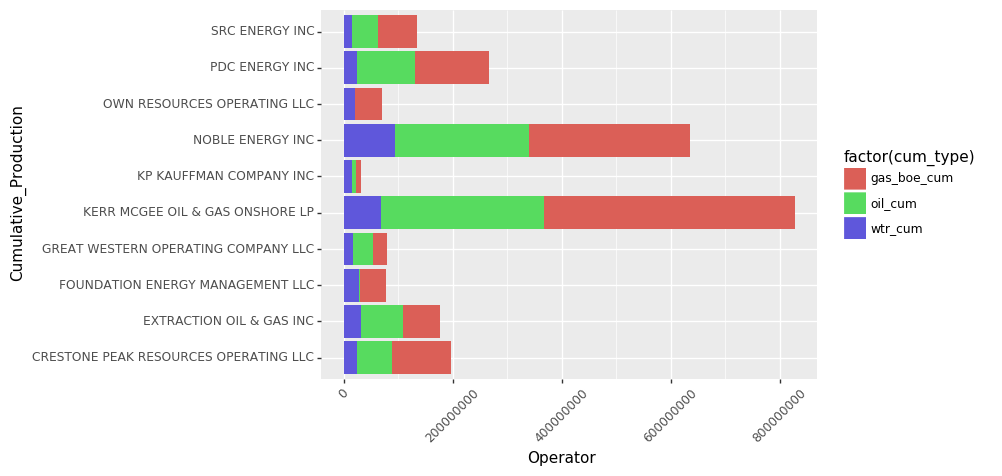

<ggplot: (-9223363306061878079)>

In [ ]:
ggplot(melt_data, aes(x = 'Oper_Cur_Name', y = 'cum', fill = 'factor(cum_type)')) + geom_bar(stat = 'identity')  + ylab('Operator') + xlab('Cumulative_Production') + coord_flip() + theme_gray() + theme(axis_text_x=element_text(angle=45))

## Time series exploration

In [ ]:
limitfms = baseData[baseData['formation_code'].isin(['NB-CD','NBRR','CODL','JSND','SUSX','N-COM','DSND','SX-SN','NBFHC','CD-FH','CLCDFH','NFCC'])]
limitfms['Date'] = pd.to_datetime(limitfms['Date'])
limitfms.head()

,ST,sidetrack_num,formation_code,well_status,prod_days,water_disp_code,water_vol,water_press_tbg,water_press_csg,bom_invent,oil_vol,adjustment,eom_invent,gravity_sale,gas_vol,shrink,gas_prod,gas_press_tbg,gas_press_csg,operator_num,name,facility_name,facility_num,accepted_date,revised,Year,Month,Date,Api_seq_num,API,API_Label,Operat_Num,Operator,Well_Num,Well_Name,Well_Title,Citing_Typ,Spud_Date,Ground_Ele,Max_MD,Max_TVD,Field_Code,Field_Name,Facil_Id,Facil_Type,Facil_Stat,Stat_Date,Loc_Qual,Loc_ID,Loc_Name,Dist_N_S,Dir_N_S,Dist_E_W,Dir_E_W,Qtr_Qtr,Section,Township,Range,Meridian,Latitude,Longitude,Utm_X,Utm_Y,spud_date,stat_date,API_8,Sidetrack_num,formation_cat,well_stat_cat
1999-08-01,5,0,NB-CD,PR,21.0,NaN,NaN,NaN,NaN,38.0,33.0,NaN,71.0,NaN,NaN,NaN,308.0,NaN,NaN,41385,HS RESOURCES INC ...,HSR-RENSHAW,5-28A,1999-12-20 00:00:00,NaN,1999,8,1999-08-01,14340,1231434000,05-123-14340,47120,KERR MCGEE OIL & GAS ONSHORE LP,5-28A,HSR-RENSHAW,5-28A HSR-RENSHAW,ACTUAL,07/19/1989,4948.0,8011.0,NaN,90750.0,WATTENBERG,246543,WELL,TA,11/01/2019,ACTUAL LatLong,327224,HSR-RENSHAW-63N66W 28SWNW,1980.0,N,660.0,W,SWNW,28,3N,66W,6,40.19779,-104.78922,517940,4449732,1989-07-19,2019-11-01,12314340,00,NB-CD,PR
1999-10-01,5,0,NB-CD,PR,31.0,NaN,NaN,NaN,NaN,10.0,40.0,NaN,18.0,52.9,NaN,NaN,258.0,NaN,NaN,41385,HS RESOURCES INC ...,HSR-RENSHAW,5-28A,1999-12-20 00:00:00,NaN,1999,10,1999-10-01,14340,1231434000,05-123-14340,47120,KERR MCGEE OIL & GAS ONSHORE LP,5-28A,HSR-RENSHAW,5-28A HSR-RENSHAW,ACTUAL,07/19/1989,4948.0,8011.0,NaN,90750.0,WATTENBERG,246543,WELL,TA,11/01/2019,ACTUAL LatLong,327224,HSR-RENSHAW-63N66W 28SWNW,1980.0,N,660.0,W,SWNW,28,3N,66W,6,40.19779,-104.78922,517940,4449732,1989-07-19,2019-11-01,12314340,00,NB-CD,PR
1999-06-01,5,0,NB-CD,PR,30.0,NaN,NaN,NaN,NaN,28.0,40.0,NaN,68.0,NaN,NaN,NaN,401.0,NaN,NaN,41385,HS RESOURCES INC ...,HSR-RENSHAW,5-28A,1999-11-18 00:00:00,NaN,1999,6,1999-06-01,14340,1231434000,05-123-14340,47120,KERR MCGEE OIL & GAS ONSHORE LP,5-28A,HSR-RENSHAW,5-28A HSR-RENSHAW,ACTUAL,07/19/1989,4948.0,8011.0,NaN,90750.0,WATTENBERG,246543,WELL,TA,11/01/2019,ACTUAL LatLong,327224,HSR-RENSHAW-63N66W 28SWNW,1980.0,N,660.0,W,SWNW,28,3N,66W,6,40.19779,-104.78922,517940,4449732,1989-07-19,2019-11-01,12314340,00,NB-CD,PR
1999-03-01,5,0,NB-CD,PR,29.0,NaN,NaN,NaN,NaN,12.0,56.0,NaN,68.0,NaN,NaN,NaN,509.0,NaN,NaN,41385,HS RESOURCES INC ...,HSR-RENSHAW,5-28A,1999-11-29 00:00:00,NaN,1999,3,1999-03-01,14340,1231434000,05-123-14340,47120,KERR MCGEE OIL & GAS ONSHORE LP,5-28A,HSR-RENSHAW,5-28A HSR-RENSHAW,ACTUAL,07/19/1989,4948.0,8011.0,NaN,90750.0,WATTENBERG,246543,WELL,TA,11/01/2019,ACTUAL LatLong,327224,HSR-RENSHAW-63N66W 28SWNW,1980.0,N,660.0,W,SWNW,28,3N,66W,6,40.19779,-104.78922,517940,4449732,1989-07-19,2019-11-01,12314340,00,NB-CD,PR
1999-07-01,5,0,NB-CD,PR,31.0,NaN,NaN,NaN,NaN,68.0,40.0,NaN,38.0,54.3,NaN,NaN,368.0,NaN,NaN,41385,HS RESOURCES INC ...,HSR-RENSHAW,5-28A,1999-11-18 00:00:00,NaN,1999,7,1999-07-01,14340,1231434000,05-123-14340,47120,KERR MCGEE OIL & GAS ONSHORE LP,5-28A,HSR-RENSHAW,5-28A HSR-RENSHAW,ACTUAL,07/19/1989,4948.0,8011.0,NaN,90750.0,WATTENBERG,246543,WELL,TA,11/01/2019,ACTUAL LatLong,327224,HSR-RENSHAW-63N66W 28SWNW,1980.0,N,660.0,W,SWNW,28,3N,66W,6,40.19779,-104.78922,517940,4449732,1989-07-19,2019-11-01,12314340,00,NB-CD,PR


In [ ]:
# Generate time series data aggregates
ts_agg = limitfms.groupby(['Date'])['oil_vol', 'water_vol', 'gas_vol'].sum().reset_index().melt(id_vars = ['Date'], var_name = 'cum_type', value_name = 'cum')
ts_agg.head()

,Date,cum_type,cum
0,1997-01-01,oil_vol,0.0
1,1997-02-01,oil_vol,0.0
2,1997-03-01,oil_vol,0.0
3,1997-04-01,oil_vol,0.0
4,1997-05-01,oil_vol,0.0


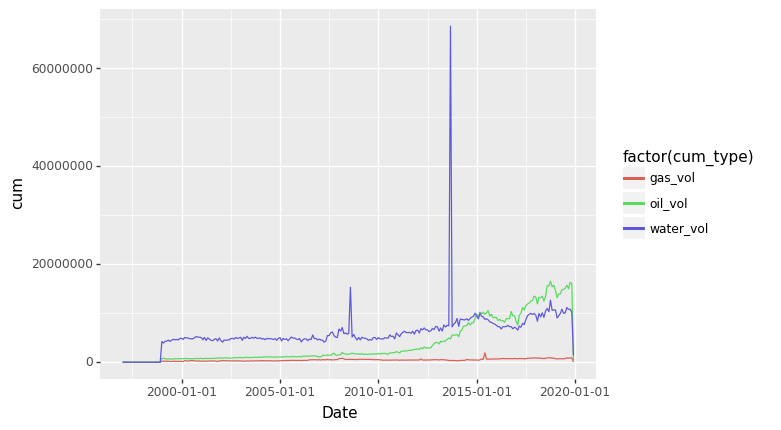

<ggplot: (-9223363254281873120)>

In [ ]:
ggplot(ts_agg,aes(x = 'Date', y = 'cum', color = 'factor(cum_type)')) + geom_line()

In [ ]:
ts_agg[ts_agg['cum_type'] == 'water_vol'].sort_values(['cum'], ascending = False)

,Date,cum_type,cum
476,2013-09-01,water_vol,68620930.0
415,2008-08-01,water_vol,15308891.0
537,2018-10-01,water_vol,12671687.0
547,2019-08-01,water_vol,11163873.0
535,2018-08-01,water_vol,10975026.0
...,...,...,...
292,1998-05-01,water_vol,0.0
293,1998-06-01,water_vol,0.0
294,1998-07-01,water_vol,0.0
298,1998-11-01,water_vol,0.0


In [ ]:
# Imputing outlier
ts_agg.iloc[476, 2]  = 15308891.0

In [ ]:
ts_agg[ts_agg['cum_type'] == 'water_vol'].sort_values(['cum'], ascending = False)

,Date,cum_type,cum
476,2013-09-01,water_vol,15308891.0
415,2008-08-01,water_vol,15308891.0
537,2018-10-01,water_vol,12671687.0
547,2019-08-01,water_vol,11163873.0
535,2018-08-01,water_vol,10975026.0
...,...,...,...
292,1998-05-01,water_vol,0.0
293,1998-06-01,water_vol,0.0
294,1998-07-01,water_vol,0.0
298,1998-11-01,water_vol,0.0


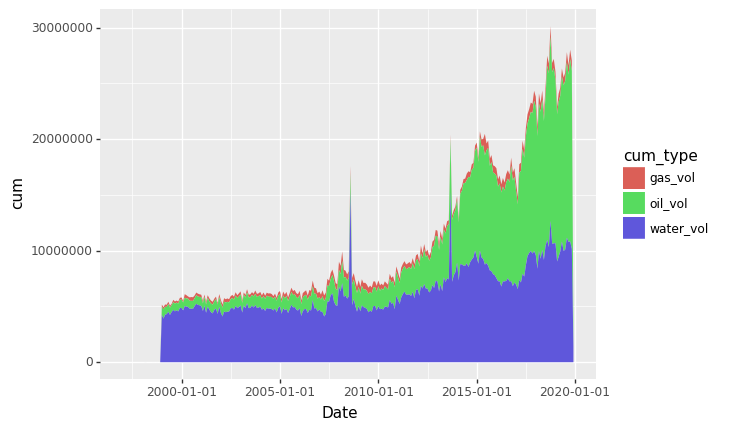

<ggplot: (-9223363287688869923)>

In [ ]:
ggplot(ts_agg, aes(x = 'Date', y = 'cum', fill = 'cum_type')) + geom_area() #+ geom_smooth(alpha = 0.2)

In [ ]:
# Plot by faceting formation codes - Need to generate new aggregates
ts_agg_2 = limitfms.groupby(['Date', 'formation_code'])['oil_vol', 'water_vol', 'gas_vol'].sum().reset_index().melt(id_vars = ['Date', 'formation_code'], var_name = 'cum_type', value_name = 'cum')
ts_agg_2.head()

,Date,formation_code,cum_type,cum
0,1997-01-01,JSND,oil_vol,0.0
1,1997-02-01,JSND,oil_vol,0.0
2,1997-03-01,JSND,oil_vol,0.0
3,1997-04-01,JSND,oil_vol,0.0
4,1997-05-01,JSND,oil_vol,0.0


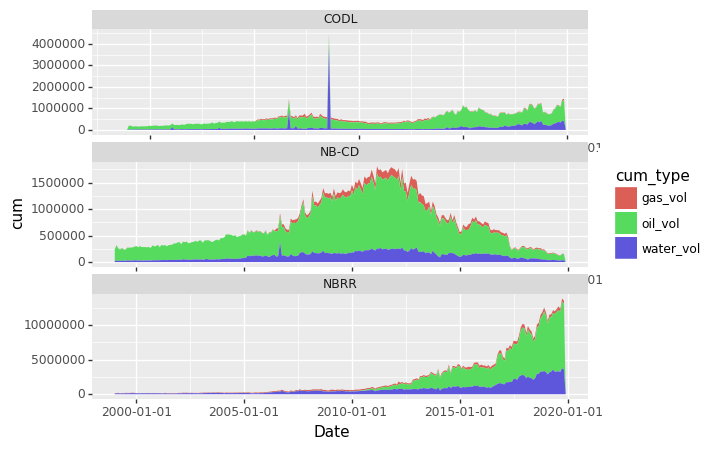

<ggplot: (-9223363287688843099)>

In [ ]:
# Need to investigate and remove outliers
ggplot(ts_agg_2[ts_agg_2['formation_code'].isin(['NBRR', 'CODL', 'NB-CD'])], aes(x = 'Date', y = 'cum', fill = 'cum_type')) + geom_area()  + facet_wrap('formation_code', nrow = 3, scales = 'free')# + facet_wrap('well_type_cat')

In [ ]:
# Analyse based on well type cat

# Aggregating data
ts_base = limitfms.merge(rollup_df[['API', 'well_type_cat']].drop_duplicates(), on = ['API'], how = 'left')

In [ ]:
well_type_cat_map_df = rollup_df[['API', 'well_type_cat']].drop_duplicates()
well_type_cat_map_df.head()

,API,well_type_cat
0,10502900,Vertical
1,10504400,Vertical
2,10507000,Vertical
3,10524200,Vertical
4,10526300,Vertical


In [ ]:
ts_base = limitfms.merge(well_type_cat_map_df, on = ['API'], how = 'inner')
ts_base['well_type_cat'].isnull().value_counts(5)

False    6310467
Name: well_type_cat, dtype: int64

In [ ]:
ts_agg_2 = ts_base.groupby(['Date', 'formation_code', 'well_type_cat'])['oil_vol', 'water_vol', 'gas_vol'].sum().reset_index().melt(id_vars = ['Date', 'formation_code', 'well_type_cat'], var_name = 'cum_type', value_name = 'cum')
ts_agg_2 = ts_agg_2[~ts_agg_2['cum'].isnull()]
ts_agg_2.head

,Date,formation_code,well_type_cat,cum_type,cum
24,1997-01-01,JSND,Vertical,oil_vol,0.0
84,1997-02-01,JSND,Vertical,oil_vol,0.0
144,1997-03-01,JSND,Vertical,oil_vol,0.0
204,1997-04-01,JSND,Vertical,oil_vol,0.0
264,1997-05-01,JSND,Vertical,oil_vol,0.0


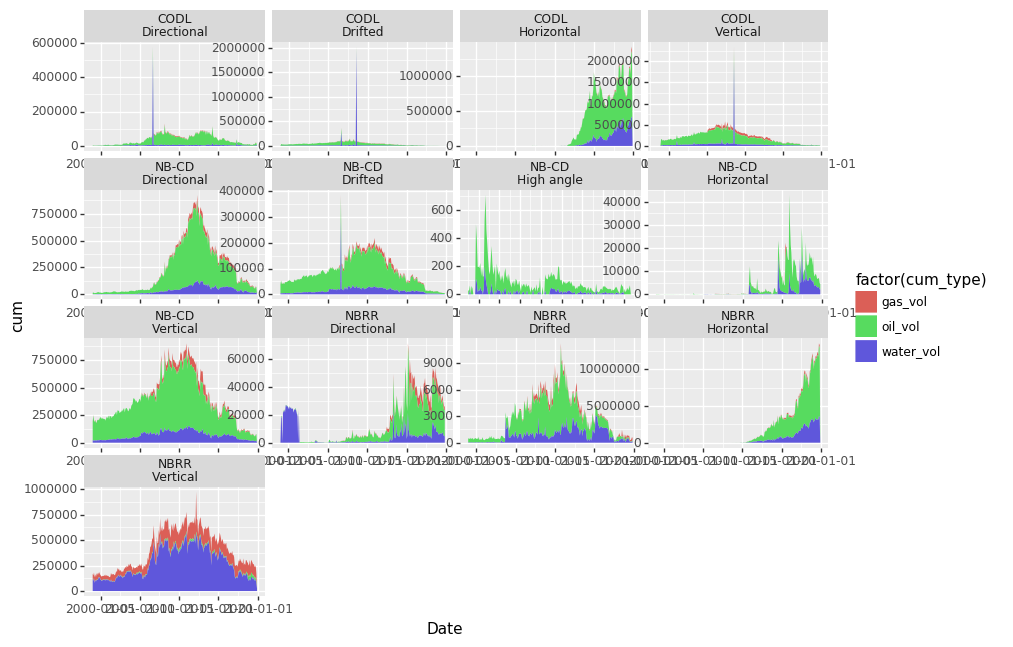

<ggplot: (-9223363306179942361)>

In [ ]:
import plotnine as plt9
plt9.options.figure_size = (6.4*1.5, 4.8*1.5)
ggplot(ts_agg_2[ts_agg_2['formation_code'].isin(['CODL', 'NBRR', 'NB-CD'])], aes(x = 'Date', y = 'cum', fill = 'factor(cum_type)')) + geom_area() + facet_wrap('~ formation_code + well_type_cat ', scales = 'free')

In [ ]:
ts_agg_2['formation_code'].nunique()

12